In [1]:
import pandas as pd

df=pd.read_csv('./data/fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [2]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data

In [3]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


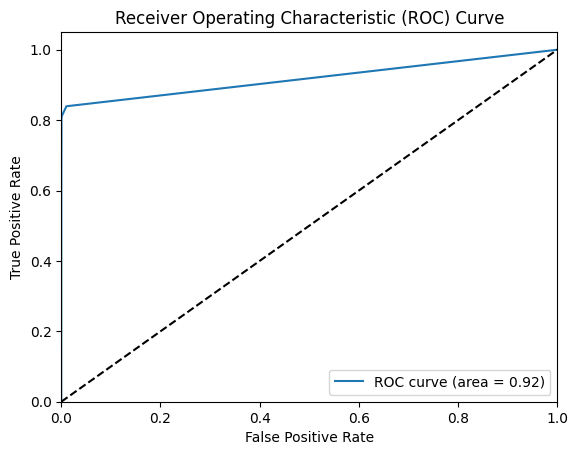

In [4]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [5]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [6]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0


#### b) Analysis with 70% Training and 30% Testing Split

In [7]:
# New train-test split: 70% training, 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, 
                                                test_size=0.30, 
                                                random_state=1)

print("Original split (60%/40%):")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print(f"Training fraud cases: {sum(y_train)}, Testing fraud cases: {sum(y_test)}")

print("\nNew split (70%/30%):")
print(f"Training samples: {len(X_train_70)}, Testing samples: {len(X_test_30)}")
print(f"Training fraud cases: {sum(y_train_70)}, Testing fraud cases: {sum(y_test_30)}")


Original split (60%/40%):
Training samples: 13015, Testing samples: 8678
Training fraud cases: 219, Testing fraud cases: 137

New split (70%/30%):
Training samples: 15185, Testing samples: 6508
Training fraud cases: 249, Testing fraud cases: 107


In [8]:
# Train K-NN model with 70%/30% split
steps_70 = [('scaler', StandardScaler()),         
           ('knn', KNeighborsClassifier(n_neighbors=5))]

knn_pipeline_70 = Pipeline(steps_70)
knn_pipeline_70.fit(X_train_70, y_train_70)

print("Model trained with 70%/30% split")


Model trained with 70%/30% split


In [9]:
# Evaluate model with 70%/30% split
ypred_test_70 = knn_pipeline_70.predict(X_test_30)
mat_clf_70 = confusion_matrix(y_test_30, ypred_test_70)
report_clf_70 = classification_report(y_test_30, ypred_test_70)

print("=== 70%/30% Split - Test Results ===")
print("Confusion Matrix:")
print(mat_clf_70)
print("\nClassification Report:")
print(report_clf_70)

ypred_testP_70 = knn_pipeline_70.predict_proba(X_test_30)
auc_70 = roc_auc_score(y_test_30, ypred_testP_70[:,1])
print(f"AUC Score: {auc_70}")


=== 70%/30% Split - Test Results ===
Confusion Matrix:
[[6398    3]
 [  22   85]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508

AUC Score: 0.9287151394276887


In [10]:
# Comprehensive Performance Comparison
import pandas as pd

print("=== PERFORMANCE COMPARISON ===\n")

# Extract metrics from original model (60%/40% split)
# From previous results: precision=0.97, recall=0.80, f1=0.88, auc=0.919
original_precision = 0.97
original_recall = 0.80
original_f1 = 0.88
original_auc = 0.9186226676477651

# Extract metrics from new model (70%/30% split)
from sklearn.metrics import precision_score, recall_score, f1_score

new_precision = precision_score(y_test_30, ypred_test_70)
new_recall = recall_score(y_test_30, ypred_test_70)
new_f1 = f1_score(y_test_30, ypred_test_70)
new_auc = auc_70

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    '60%/40% Split': [original_precision, original_recall, original_f1, original_auc],
    '70%/30% Split': [new_precision, new_recall, new_f1, new_auc],
    'Difference': [new_precision - original_precision, 
                   new_recall - original_recall,
                   new_f1 - original_f1,
                   new_auc - original_auc]
})

print(comparison_df.to_string(index=False, float_format='%.4f'))

print(f"\n=== KEY OBSERVATIONS ===")
print(f"• Training samples increased from {len(X_train)} to {len(X_train_70)} (+{len(X_train_70) - len(X_train)})")
print(f"• Testing samples decreased from {len(X_test)} to {len(X_test_30)} (-{len(X_test) - len(X_test_30)})")
print(f"• AUC change: {new_auc - original_auc:+.4f}")
print(f"• Precision change: {new_precision - original_precision:+.4f}")
print(f"• Recall change: {new_recall - original_recall:+.4f}")


=== PERFORMANCE COMPARISON ===

   Metric  60%/40% Split  70%/30% Split  Difference
Precision         0.9700         0.9659     -0.0041
   Recall         0.8000         0.7944     -0.0056
 F1-Score         0.8800         0.8718     -0.0082
      AUC         0.9186         0.9287      0.0101

=== KEY OBSERVATIONS ===
• Training samples increased from 13015 to 15185 (+2170)
• Testing samples decreased from 8678 to 6508 (-2170)
• AUC change: +0.0101
• Precision change: -0.0041
• Recall change: -0.0056


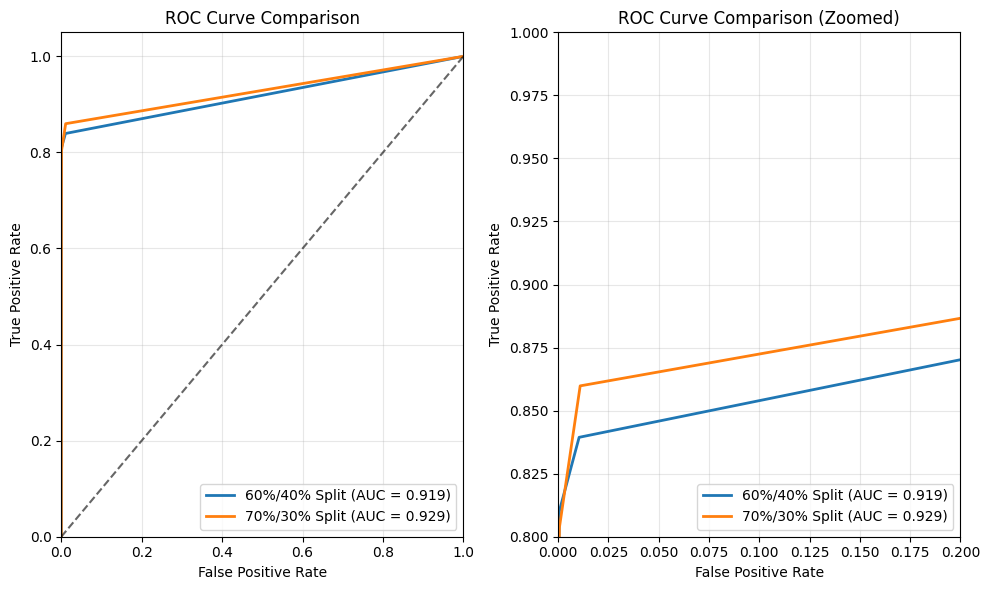

In [11]:
# ROC Curve Comparison
import matplotlib.pyplot as plt

# Calculate ROC curve for 70%/30% split
fpr_70, tpr_70, thresholds_70 = roc_curve(y_test_30, ypred_testP_70[:,1])

# Plot both ROC curves
plt.figure(figsize=(10, 6))

# Original model (60%/40% split)
ypred_testP_original = knn_pipeline.predict_proba(X_test)
fpr_original, tpr_original, _ = roc_curve(y_test, ypred_testP_original[:,1])
auc_original_recalc = roc_auc_score(y_test, ypred_testP_original[:,1])

plt.subplot(1, 2, 1)
plt.plot(fpr_original, tpr_original, label=f'60%/40% Split (AUC = {auc_original_recalc:.3f})', linewidth=2)
plt.plot(fpr_70, tpr_70, label=f'70%/30% Split (AUC = {auc_70:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(fpr_original, tpr_original, label=f'60%/40% Split (AUC = {auc_original_recalc:.3f})', linewidth=2)
plt.plot(fpr_70, tpr_70, label=f'70%/30% Split (AUC = {auc_70:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Zoomed)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### c) Impact of Different K Values in KNN (Test Size Fixed at 40%)

In [12]:
# Evaluate KNN performance with different K values (1 to 20)
# Test size at 40%

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score, 
                           precision_score, f1_score, classification_report)
import matplotlib.pyplot as plt

# Use the existing train-test split (40% test size)

# Initialize lists to store results
k_values = list(range(1, 21))  # k from 1 to 20
results = {
    'K': [],
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1_Score': []
}

print("Evaluating KNN performance with different K values...")
print("=" * 60)

# Evaluate each k value
for k in k_values:
    # Create pipeline with current k value
    steps = [('scaler', StandardScaler()),         
             ('knn', KNeighborsClassifier(n_neighbors=k))]
    
    knn_pipeline = Pipeline(steps)
    knn_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_pipeline.predict(X_test)
    y_pred_proba = knn_pipeline.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results['K'].append(k)
    results['Accuracy'].append(accuracy)
    results['AUC'].append(auc)
    results['Recall'].append(recall)
    results['Precision'].append(precision)
    results['F1_Score'].append(f1)
    
    print(f"K={k:2d}: Acc={accuracy:.4f}, AUC={auc:.4f}, Rec={recall:.4f}, Prec={precision:.4f}, F1={f1:.4f}")

print("=" * 60)


Evaluating KNN performance with different K values...
K= 1: Acc=0.9946, AUC=0.9075, Rec=0.8175, Prec=0.8358, F1=0.8266
K= 2: Acc=0.9962, AUC=0.9118, Rec=0.7810, Prec=0.9727, F1=0.8664
K= 3: Acc=0.9964, AUC=0.9153, Rec=0.7956, Prec=0.9732, F1=0.8755
K= 4: Acc=0.9964, AUC=0.9188, Rec=0.7956, Prec=0.9732, F1=0.8755
K= 5: Acc=0.9964, AUC=0.9186, Rec=0.7956, Prec=0.9732, F1=0.8755
K= 6: Acc=0.9961, AUC=0.9185, Rec=0.7737, Prec=0.9725, F1=0.8618
K= 7: Acc=0.9963, AUC=0.9256, Rec=0.7883, Prec=0.9730, F1=0.8710
K= 8: Acc=0.9959, AUC=0.9253, Rec=0.7591, Prec=0.9720, F1=0.8525
K= 9: Acc=0.9960, AUC=0.9252, Rec=0.7664, Prec=0.9722, F1=0.8571
K=10: Acc=0.9960, AUC=0.9250, Rec=0.7664, Prec=0.9722, F1=0.8571
K=11: Acc=0.9960, AUC=0.9249, Rec=0.7664, Prec=0.9722, F1=0.8571
K=12: Acc=0.9957, AUC=0.9285, Rec=0.7518, Prec=0.9717, F1=0.8477
K=13: Acc=0.9957, AUC=0.9322, Rec=0.7518, Prec=0.9717, F1=0.8477
K=14: Acc=0.9957, AUC=0.9321, Rec=0.7518, Prec=0.9717, F1=0.8477
K=15: Acc=0.9957, AUC=0.9320, Rec=0.

In [13]:
# Create results dataframe and analyze the best performing model
results_df = pd.DataFrame(results)
print("\n=== COMPLETE RESULTS TABLE ===")
print(results_df.to_string(index=False, float_format='%.4f'))

# Find best performing models based on different metrics
best_accuracy_idx = results_df['Accuracy'].idxmax()
best_auc_idx = results_df['AUC'].idxmax()
best_recall_idx = results_df['Recall'].idxmax()
best_precision_idx = results_df['Precision'].idxmax()
best_f1_idx = results_df['F1_Score'].idxmax()

print(f"\n=== BEST PERFORMING K VALUES BY METRIC ===")
print(f"Best Accuracy:  K={results_df.loc[best_accuracy_idx, 'K']:.0f} (Accuracy: {results_df.loc[best_accuracy_idx, 'Accuracy']:.4f})")
print(f"Best AUC:       K={results_df.loc[best_auc_idx, 'K']:.0f} (AUC: {results_df.loc[best_auc_idx, 'AUC']:.4f})")
print(f"Best Recall:    K={results_df.loc[best_recall_idx, 'K']:.0f} (Recall: {results_df.loc[best_recall_idx, 'Recall']:.4f})")
print(f"Best Precision: K={results_df.loc[best_precision_idx, 'K']:.0f} (Precision: {results_df.loc[best_precision_idx, 'Precision']:.4f})")
print(f"Best F1-Score:  K={results_df.loc[best_f1_idx, 'K']:.0f} (F1: {results_df.loc[best_f1_idx, 'F1_Score']:.4f})")

# Calculate overall best model using F1-score as primary metric
best_overall_k = results_df.loc[best_f1_idx, 'K']
best_overall_metrics = results_df.iloc[best_f1_idx]

print(f"\n=== OVERALL BEST MODEL ===")
print(f"Best K value: {best_overall_k:.0f}")
print(f"Reasoning: F1-Score is chosen as the primary metric because it balances precision and recall,")
print(f"which is crucial for fraud detection where both false positives and false negatives are costly.")
print(f"\nPerformance of K={best_overall_k:.0f}:")
print(f"  • Accuracy:  {best_overall_metrics['Accuracy']:.4f}")
print(f"  • AUC:       {best_overall_metrics['AUC']:.4f}")
print(f"  • Recall:    {best_overall_metrics['Recall']:.4f}")
print(f"  • Precision: {best_overall_metrics['Precision']:.4f}")
print(f"  • F1-Score:  {best_overall_metrics['F1_Score']:.4f}")



=== COMPLETE RESULTS TABLE ===
 K  Accuracy    AUC  Recall  Precision  F1_Score
 1    0.9946 0.9075  0.8175     0.8358    0.8266
 2    0.9962 0.9118  0.7810     0.9727    0.8664
 3    0.9964 0.9153  0.7956     0.9732    0.8755
 4    0.9964 0.9188  0.7956     0.9732    0.8755
 5    0.9964 0.9186  0.7956     0.9732    0.8755
 6    0.9961 0.9185  0.7737     0.9725    0.8618
 7    0.9963 0.9256  0.7883     0.9730    0.8710
 8    0.9959 0.9253  0.7591     0.9720    0.8525
 9    0.9960 0.9252  0.7664     0.9722    0.8571
10    0.9960 0.9250  0.7664     0.9722    0.8571
11    0.9960 0.9249  0.7664     0.9722    0.8571
12    0.9957 0.9285  0.7518     0.9717    0.8477
13    0.9957 0.9322  0.7518     0.9717    0.8477
14    0.9957 0.9321  0.7518     0.9717    0.8477
15    0.9957 0.9320  0.7518     0.9717    0.8477
16    0.9956 0.9319  0.7445     0.9714    0.8430
17    0.9957 0.9427  0.7518     0.9717    0.8477
18    0.9956 0.9426  0.7445     0.9714    0.8430
19    0.9956 0.9462  0.7445     0.971

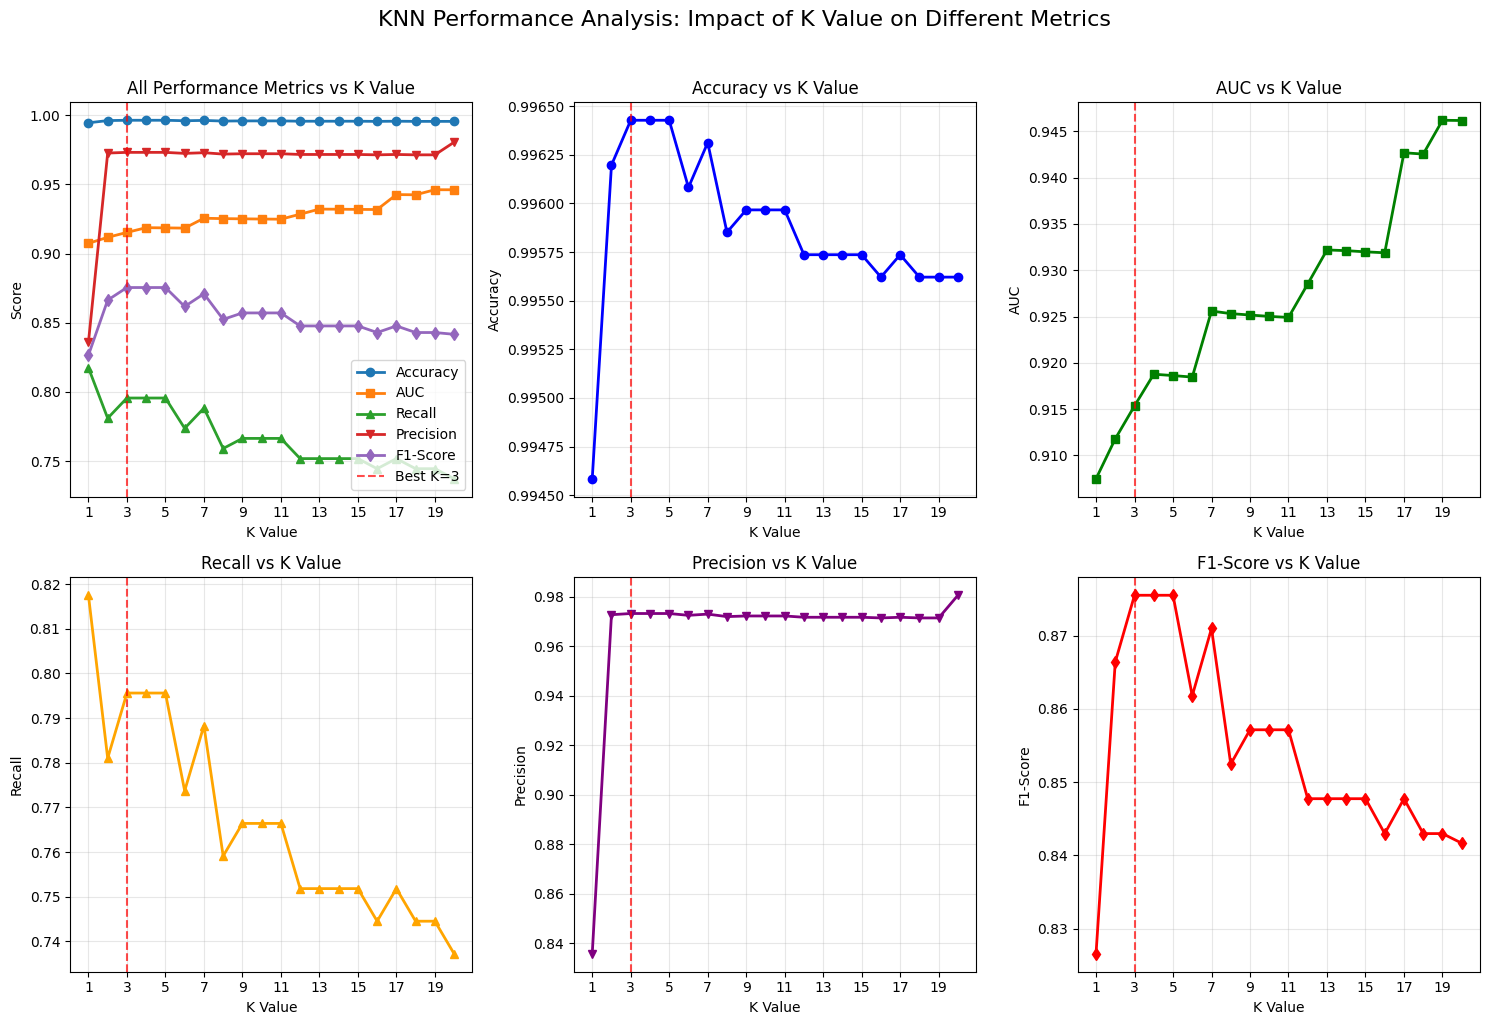

In [14]:
# Visualize how model performance varies with different K values
plt.figure(figsize=(15, 10))

# Plot 1: All metrics together
plt.subplot(2, 3, 1)
plt.plot(results_df['K'], results_df['Accuracy'], 'o-', label='Accuracy', linewidth=2, markersize=6)
plt.plot(results_df['K'], results_df['AUC'], 's-', label='AUC', linewidth=2, markersize=6)
plt.plot(results_df['K'], results_df['Recall'], '^-', label='Recall', linewidth=2, markersize=6)
plt.plot(results_df['K'], results_df['Precision'], 'v-', label='Precision', linewidth=2, markersize=6)
plt.plot(results_df['K'], results_df['F1_Score'], 'd-', label='F1-Score', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7, label=f'Best K={best_overall_k:.0f}')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('All Performance Metrics vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Plot 2: Accuracy
plt.subplot(2, 3, 2)
plt.plot(results_df['K'], results_df['Accuracy'], 'o-', color='blue', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Plot 3: AUC
plt.subplot(2, 3, 3)
plt.plot(results_df['K'], results_df['AUC'], 's-', color='green', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('AUC')
plt.title('AUC vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Plot 4: Recall
plt.subplot(2, 3, 4)
plt.plot(results_df['K'], results_df['Recall'], '^-', color='orange', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Recall')
plt.title('Recall vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Plot 5: Precision
plt.subplot(2, 3, 5)
plt.plot(results_df['K'], results_df['Precision'], 'v-', color='purple', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Precision')
plt.title('Precision vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Plot 6: F1-Score
plt.subplot(2, 3, 6)
plt.plot(results_df['K'], results_df['F1_Score'], 'd-', color='red', linewidth=2, markersize=6)
plt.axvline(x=best_overall_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('F1-Score')
plt.title('F1-Score vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

plt.suptitle('KNN Performance Analysis: Impact of K Value on Different Metrics', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
